# Introducing logistic regression

A logistic regression "squashes" a linear expression into a 0-1 range using a logistic, or sigmoidal, function.  That looks like this:

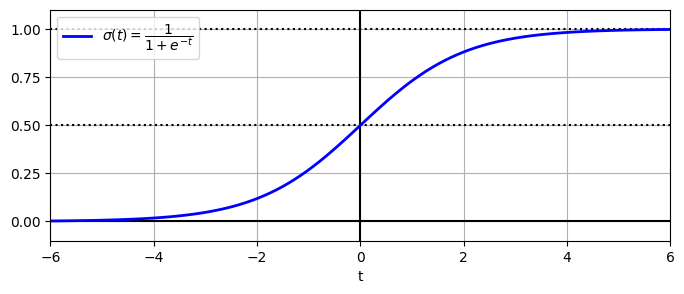

In [1]:
import numpy as np
import matplotlib.pyplot as plt
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

We'll demonstrate a logistic regression first by using the famous 'iris' dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

We only care about data and target right now.  First, let's read the dataset description.

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

Note, by conventions the "targets" correspond t indices in the target names array.  So, the above are all 'setosa'.  As the slmplest form of a logistic reggression is binary classifier, let's focus just on predicting "virginica". We'll do that by relabeling our "targets".  By convention, we often use the variable `X` to refer to data, and `y` to refer to targets.

In [7]:
from sklearn.linear_model import LogisticRegression

X = iris.data.values
y = iris.target_names[iris.target] == 'virginica'
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Now we create a train / test split, and then train the classifier.  See comments in code!

In [8]:
from sklearn.model_selection import train_test_split

# train test split creates four groups.  Random state is set here for replicability purposes, and is optional
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the machine learning model - this is typically how we do things in SciKit learn
log_reg = LogisticRegression(random_state=42)

# Train the clasifier
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Ok, great!  Now we can examine performance.  Typically, we'd do this by predicting classes, and the comparing the outcome.  Like this.

In [9]:
# Here are the predictions
y_pred = log_reg.predict(X_test)

We can use any number of scoring routines from scikit learn to test our results. But let's do it manually first (this is just accuracy).


In [10]:
n_correct = sum(y_pred == y_test)
print(n_correct / len(y_pred))

1.0


## Exercise 1:

Try adding some noise to your data and see how your accuracy changes.  Note that you can add noise to a matrix in numpy like this:

In [11]:
sample = np.ones((10,10))
print("Original matrix")
print(sample)

# 0 is the mean, .3 is the standard deviation
# The last parameter is the shape of the matrix we want to retrieve
noise = np.random.normal(0,5,X_train.shape)
noisy_sample = X_train + noise
print("\n\nNoisy matrix")
print(noisy_sample)

Original matrix
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Noisy matrix
[[ -1.84717006   4.42805894   1.58032962   0.09919939]
 [ 10.66878071   3.28498273  -0.50423504  -4.89434732]
 [  1.50467249   7.5469935   -4.11519846  -1.4928664 ]
 [  7.36253791  -2.43353762   4.78917253   9.05315742]
 [  1.37334071  13.22505063  -1.1732723    6.17521837]
 [  2.20507874   8.66099568   4.64239427  -0.16372327]
 [  4.2939895    4.87744831  -0.64241551   2.73297361]
 [  2.99274088   2.35591194  10.32400918   1.23070299]
 [  2.99817791  -7.09216266   2.18741369  -7.16318203]
 [  4.99340938  -3.76466134   4.94417197   8.72804032]
 [  5.95668925   8.20308593   8.51924224  -1.83582068]
 [ -2.13241799  11.1877781    0.9

If you're feeling ambitious, create a loop and graph your accuracy across noise levels!  You'll want a function for this.

In [12]:
# 0 is the mean, .3 is the standard deviation
# The last parameter is the shape of the matrix we want to retrieve
noise = np.random.normal(0,1,X_train.shape)
X_noisy = X_train + noise
log_reg = LogisticRegression(random_state=42)

# Train the clasifier
log_reg.fit(X_noisy, y_train)
y_pred = log_reg.predict(X_test)
n_correct = sum(y_pred == y_test)
print(n_correct / len(y_pred))

1.0


# Evaluating classifiers

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:100: UserWarning: A network error occurred while downloading https://openml.org/data/v1/download/52667. Retrying...
  warn(


In [14]:
import pprint
pp = pprint.PrettyPrinter(width=120)
pp.pprint(mnist.DESCR)

('**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n'
 '**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n'
 '**Please cite**:  \n'
 '\n'
 'The MNIST database of handwritten digits with 784 features, raw data available at: '
 'http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of '
 '10,000 examples  \n'
 '\n'
 'It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a '
 'fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition '
 'methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and '
 'white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect '
 'ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalizatio

In [15]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Note, data and target exist for most sklearn datasets.  Data is a matrix of features, and target is a vector of labels.

In [16]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

If you wanted to see these as a DataFrame, you could do this:

In [17]:
import pandas as pd
df = pd.DataFrame(mnist.data)
df["target"] = mnist.target
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


But that's not really necessary here.  We'll just use these things as matrices and arrays.  Let's look at the shape here.

In [18]:
print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")
print(f"Is number of rows equal? {X.shape[0] == y.shape[0]}")

X shape = (70000, 784)
y shape = (70000,)
Is number of rows equal? True


Where does the 784 come from?  Read the docs above!

In [19]:
28 * 28

784

Let's take a look at one of these images

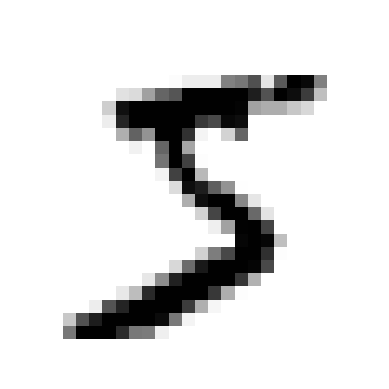

In [20]:
import matplotlib.pyplot as plt

# Define function to plot a single digit
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

What is it?

In [21]:
y[0]

'5'

Here's another sample:

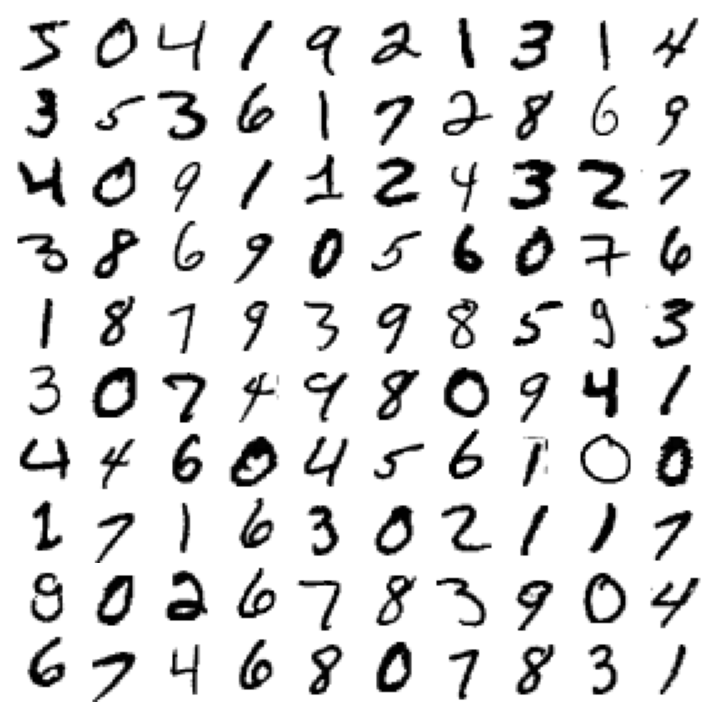

In [22]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### Training the classfier

Once again, since we're using logistic regression, let's just go with predicting '5s'.

In [23]:
from sklearn.preprocessing import StandardScaler
# Setting up the data here
# Though it's not really necessary here (MINST variables are all roughly the same) it's often useful to z-score
# your data.  Especially important for logistic regression
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Arbitratily taking the first 60000 rows here
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [24]:
# I'm going to use the SGDClassifier here - it's a lot like a logistic regression with an "sag" solver,
# but is a lot faster with larger data sets

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
# Recall we already checked that X[0] is a five
some_digit = X[0]

# Note that predict expect an array of values, so we tuck this into an array before testing.
sgd_clf.predict([some_digit])

array([ True])

## Performance measures

### Measuring accuracy with cross-validation

In [50]:
from sklearn.model_selection import cross_val_score

# Scikit learn makes it easy to use cross validation with simple measures
# CV is the number of folds
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

3370.0194991439557

# Exercise 2

Go ahead and dig into the docs to use the following scoring methods, reporting the average for each (note `np.mean` will return average over an array)

1. Precision
2. Recall
3. F1 scores

If you want more control over your classifier, use the `KFold` and related classes.

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import f1_score
# Implementing everyting by hand without using sklearn.metrics (E.G. precision_score, accuracy_score, etc...)
skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # It's a good idea to use a fresh, untrained model each time you run on new data
    # The "clone" command does that, but simplifies things by copying other parameters
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


Seems quite good!  But also always useful to compare to a naive classifer.  The `DummyClassifier` is one such instance.

In [28]:
from sklearn.dummy import DummyClassifier
# A naive "dummy" classifier functions as a sanity check. If the accuracy score obtained from the dummy classifier is too far off, your classifier may be biased
dummy_clf = DummyClassifier()
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

Instead of `cross_val_score` we can just use `cross_val_predict` to get the raw predictions - sklearn takes care of compiling our results so they are easy to process

In [58]:
from sklearn.model_selection import cross_val_predict

y_train_dummy_pred = cross_val_predict(dummy_clf, X_train, y_train_5, cv=3)
y_train_dummy_pred

array([False, False, False, ..., False, False, False])

In [60]:
y_train_5.shape == y_train_dummy_pred.shape

True

In [61]:
# You've hopefully already found the sklearn metrics library
from sklearn.metrics import confusion_matrix

dummy_cm = confusion_matrix(y_train_5, y_train_dummy_pred)
dummy_cm

array([[54579,     0],
       [ 5421,     0]])

In [32]:
# Just to get a sense of things, see what happens if we had a perfect predictor

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [33]:
from sklearn.metrics import precision_score, recall_score
# Precision = How much of the pie we actually got right, measures the % correctness of positive predictions
precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [34]:
# Same computation, using the confusion matrix above
# TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [35]:
# Recall measures the completeness of positive predictions, what % of the data you're ACTUALLY reading over in your predictive model
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [36]:
# TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [38]:
# Calculating by hand
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Precision/ Recall Trade-off

In [39]:
# The "decision_function" method returns the raw value, of the predictor, which is then
# thresholded to achieve an outcome

# Threshold is a way to decide what metric we want to optimize within a set of data.
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [40]:
# We can plug this directly into cross_val_predict to get the scores across all of our data
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [62]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

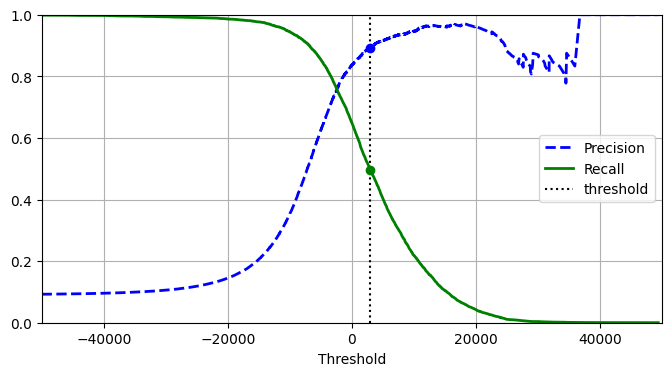

In [41]:
# Scikit learn gives us a really nice way to look at this!
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
threshold = 3000
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting

# Threshold is a way to decide what metric we want to optimize within a set of data.
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")


plt.show()

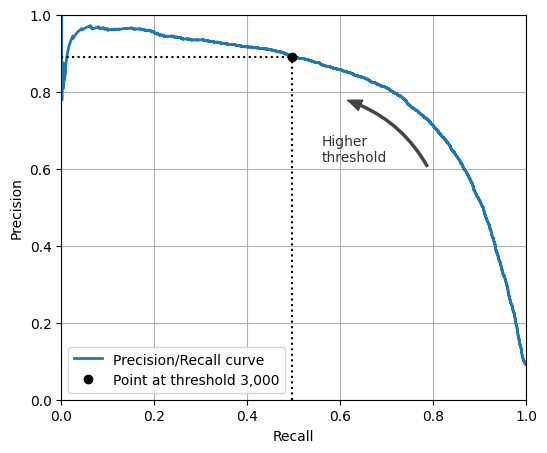

In [42]:
# We can graph these two together:

import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [43]:
# With this analysis, we can arbitrarily obtain a threshold to achieve a given level of precision or recall:

idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

# Exercise 3

1. What is recall at this threshold?  F1 score?
2. Can you do the same thing, except optimizing to achieve recall > .6?

## ROC Curves

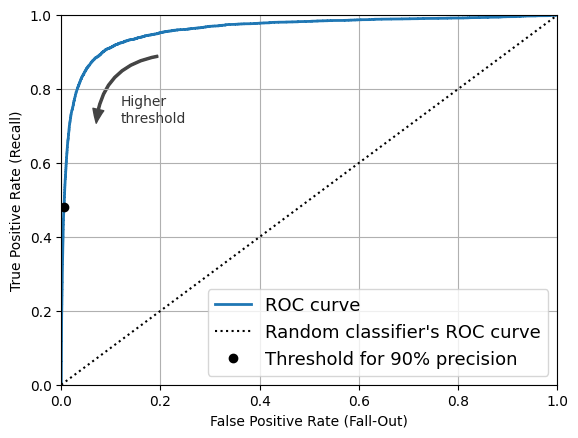

In [44]:
# SciKit learn also gives us ROC curves for free

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]


plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# just beautifies the figure
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()